In [1]:
import numpy as np

In [2]:
def f1_score(precision, recall):
  try:
    return 2 * precision * recall / (precision + recall)
  except:
    return 0.0

In [3]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [5]:
precision = 0.0
recall = 1
f1_score(precision, recall)

0.0

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\Users\ACER\.conda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9755555555555555

In [14]:
y_predict = log_reg.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_predict)


0.9473684210526315

In [17]:
recall_score(y_test, y_predict)

0.8

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [20]:
log_reg.decision_function(X_test)[:10]

array([-21.35303124, -32.84138314, -16.44337145, -79.77511761,
       -47.92327499, -24.17583324, -44.56626532, -24.26939066,
        -1.12183924, -19.03284503])

In [21]:
decision_scores = log_reg.decision_function(X_test)

In [22]:
np.min(decision_scores)

-85.70930086482205

In [23]:
np.max(decision_scores)

19.882222175236056

In [34]:
y_predict_2 = np.array(decision_scores >=-5, dtype='int') 

In [35]:
confusion_matrix(y_test, y_predict_2)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [36]:
precision_score(y_test, y_predict_2)

0.7272727272727273

In [37]:
recall_score(y_test, y_predict_2)

0.8888888888888888

In [39]:
precisions = []
recalls =[]

thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [40]:
for threshold in thresholds:
  y_predict = np.array(decision_scores >= threshold, dtype='int')
  precision = precision_score(y_test, y_predict)
  recall = recall_score(y_test, y_predict)
  precisions.append(precision)
  recalls.append(recall)
  


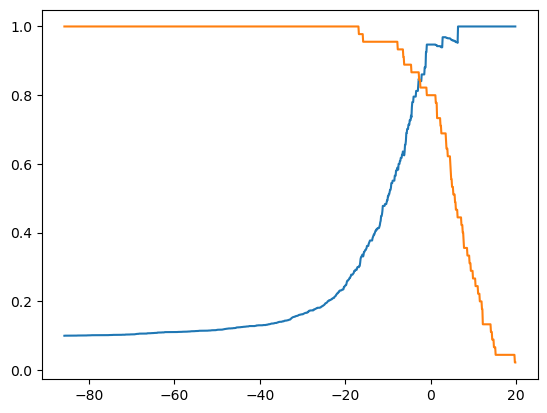

In [41]:
import matplotlib.pyplot as  plt
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

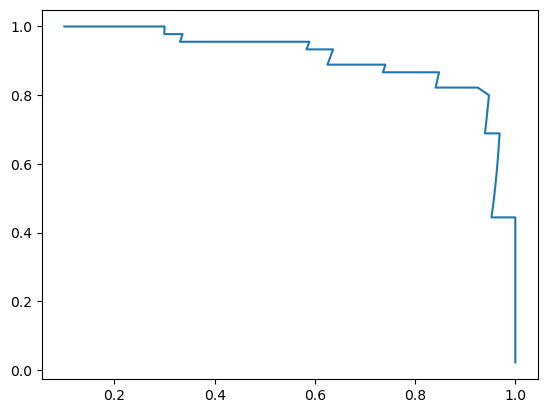

In [42]:
plt.plot(precisions, recalls)
plt.show()

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [45]:
precisions.shape

(451,)